In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [5]:
customer = pd.read_csv("E:/ANALYTIXLAB/Assignments/PYTHON_ASSIGNMENTS/Python Foundation Case Study 1 - Retail Case Study/Customer.csv")

In [6]:
product = pd.read_csv("E:/ANALYTIXLAB/Assignments/PYTHON_ASSIGNMENTS/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv")

In [7]:
transactions = pd.read_csv("E:/ANALYTIXLAB/Assignments/PYTHON_ASSIGNMENTS/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv")

# EDA
## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [8]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [9]:
product.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [10]:
transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [11]:
print("customer table -",customer.shape)
print("product table -" , product.shape)
print("transaction table -", transactions.shape)

customer table - (5647, 4)
product table - (23, 4)
transaction table - (23053, 10)


In [12]:
# to merge the both the tables easily
product.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [13]:
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concat = pd.merge(left=transactions, right=product,on=["prod_cat_code","prod_subcat_code"],how="left")

In [14]:
prod_concat.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [15]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [16]:
customer.rename(columns = {"customer_Id" : "cust_id"}, inplace = True)
customer.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [17]:
customer_final = pd.merge(left=prod_concat, right=customer,on=["cust_id"],how="left")
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,11-05-1973,F,8.0


In [18]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [19]:
print(customer_final.shape)

(23053, 15)


In [20]:
print(transactions.shape)

(23053, 10)


## 2. Prepare a summary report for the merged data set.

##### Checking for duplicates and dropping them

In [21]:
customer_final.duplicated().sum()

13

In [22]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [23]:
customer_final.duplicated().sum()

0

###### a) Customer_Final comlumns with dataypes 

In [24]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

In [25]:
# changing "DOB" object into datetime object
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])

# changing "tran_date" object into datetime object
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

<ipython-input-25-eaf041af97f7>:2: UserWarning: Parsing '26-09-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
<ipython-input-25-eaf041af97f7>:2: UserWarning: Parsing '27-07-1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
<ipython-input-25-eaf041af97f7>:2: UserWarning: Parsing '29-05-1981' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
<ipython-input-25-eaf041af97f7>:2: UserWarning: Parsing '21-04-1971' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
<ipython-input-25-eaf041af97f7>:2: UserWarning: Parsing '27-11-1979' in 

In [26]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

###### b) Top 10 observations


In [27]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,1979-11-27,F,3.0


###### b) bottom 10 observations

In [28]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


###### c) FIVE POINT SUMMARY 

In [29]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


In [30]:
customer_final.select_dtypes(object).describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


## 3. Generate histograms for all continous variables and frequency bars for all categorical variables

#### Histograms  for continous variables

In [31]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [32]:
conti_var = customer_final[['prod_subcat_code',
       'prod_cat_code','Qty', 'Rate', 'Tax', 'total_amt']]

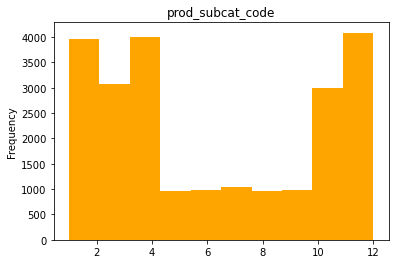

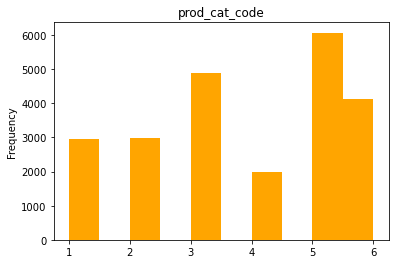

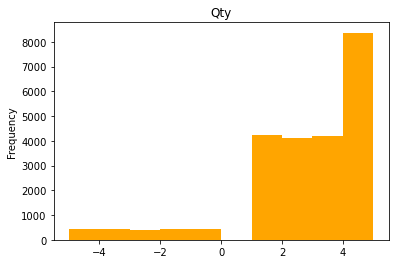

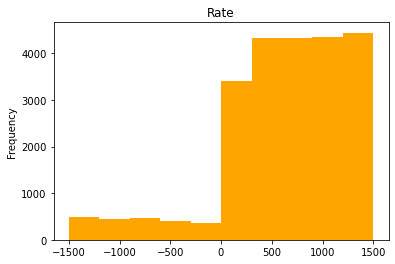

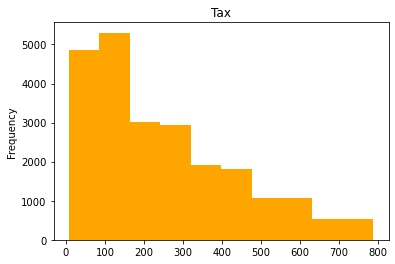

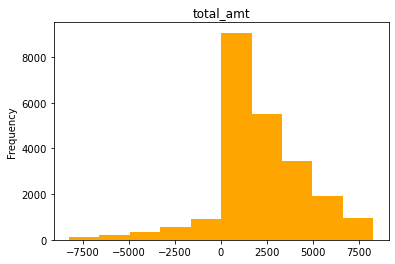

In [33]:
for var in conti_var:
    conti_var[var].plot(kind = "hist", color = "orange")
    plt.title(var)
    plt.show()

In [34]:
cate_var = customer_final.select_dtypes("object")

In [35]:
cate_var.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


#### Bar charts for Categorical variables

C:\Users\Dell\Anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


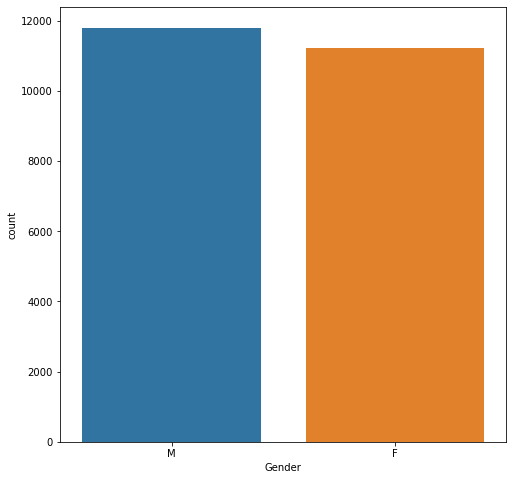

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(cate_var['Gender'])
plt.show()

C:\Users\Dell\Anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


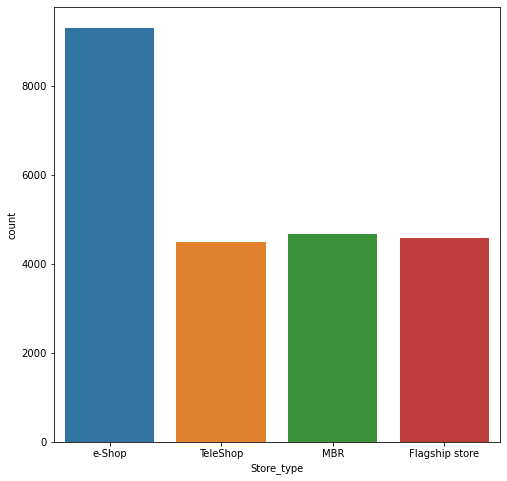

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(cate_var['Store_type'])
plt.show()

C:\Users\Dell\Anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


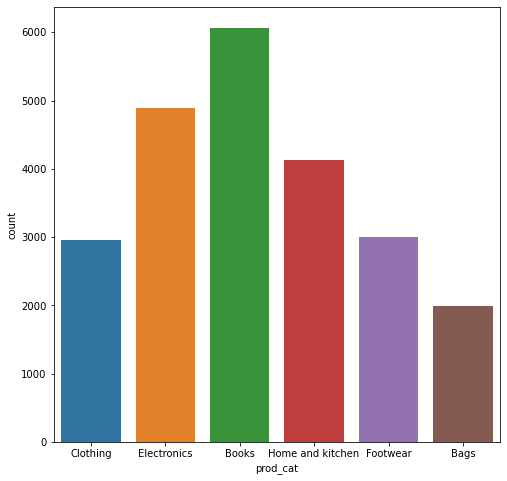

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(cate_var['prod_cat'])
plt.show()

C:\Users\Dell\Anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


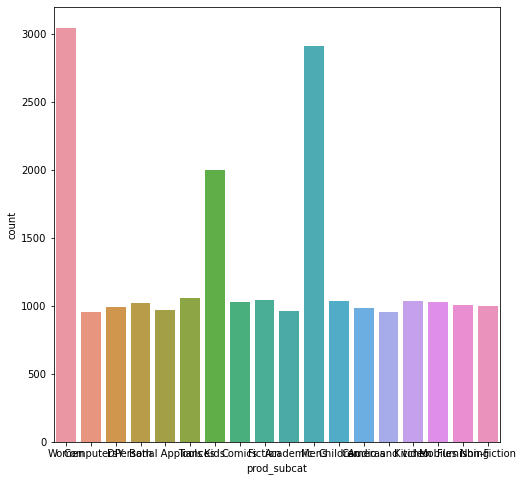

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(cate_var['prod_subcat'])
plt.show()

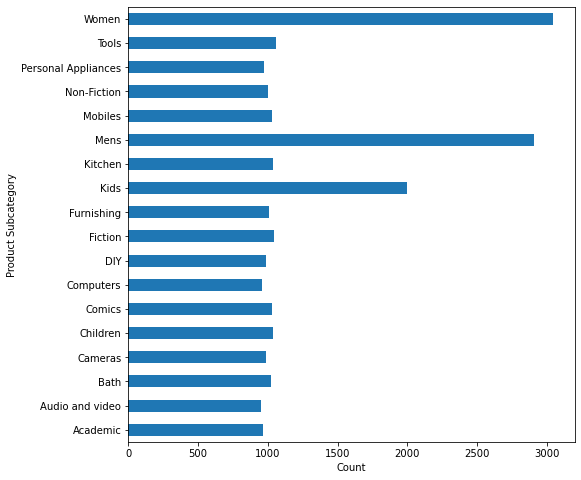

In [40]:
plt.figure(figsize=(8,8))
cate_var.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

## 4.Calculate the following information using the merged dataset :

#### a) Time period of the available transaction data

In [41]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,1975-03-12,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,1973-08-04,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,1975-05-20,F,9.0
147,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,Furnishing,1970-06-25,M,3.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,1987-08-11,M,4.0


In [42]:
min_date = customer_final["tran_date"].min()

In [43]:
max_date = customer_final["tran_date"].max()

In [44]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


In [45]:
yeardiff = max_date.year - min_date.year
print("Time period of the available transaction data is for",yeardiff,"years.")

Time period of the available transaction data is for 3 years.


#### b) Count of transactions where the total amount of transaction was negative

In [46]:
customer_final.loc[customer_final["total_amt"] < 0, "transaction_id"].count()

2164

## 5. Analyze which product categories are more popular among females vs male customers

In [47]:
pop_Category_by_gender = customer_final.groupby(by = ["Gender","prod_cat"])[["Qty"]].sum().reset_index()
pop_Category_by_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [48]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0


In [49]:
customers_by_city = customer_final.groupby(by="city_code")[["cust_id"]].count().reset_index().rename(columns = {"cust_id": "total_customers"})

In [50]:
#customers_by_city.sort_values(by = "total_customers" , axis=0, ascending=False).reset_index()

In [51]:
customers_by_city["%of_customers"] = customers_by_city["total_customers"].apply(lambda x: round(x/customers_by_city["total_customers"].sum() * 100,2))

In [52]:
customers_by_city.sort_values(by = "total_customers" , axis=0, ascending=False).reset_index()


,index,city_code,total_customers,%of_customers
0,3,4.0,2422,10.52
1,2,3.0,2410,10.46
2,4,5.0,2357,10.23
3,6,7.0,2356,10.23
4,9,10.0,2333,10.13
5,7,8.0,2328,10.11
6,1,2.0,2268,9.85
7,0,1.0,2255,9.79
8,8,9.0,2176,9.45
9,5,6.0,2127,9.23


In [53]:
customers_by_city["total_customers"].max()

2422

In [54]:
round((customers_by_city["total_customers"].max()/customers_by_city["total_customers"].sum() *100),2)

10.52

In [55]:
customers_by_city["%of_customers"].max()

10.52

## 7. Which store type sells the maximum products by value and by quantity?

In [56]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0


In [57]:
# Removing the negative quantities which represent the return of products 
sold_prod = customer_final.loc[customer_final["Qty"]>0]
sold_prod.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-09-03,M,6.0


##### Max Sales qty and rate in each stores Without return of products

In [58]:
sold_prod.groupby(by = ["Store_type"])[["Qty","Rate","total_amt"]].sum().sort_values(by="Qty",ascending=False)

,Qty,Rate,total_amt
Store_type,,,
e-Shop,25435,6651880,2.218561e+07
MBR,12581,3315996,1.090854e+07
Flagship store,12460,3280517,1.090662e+07
TeleShop,12225,3158635,1.045312e+07


##### Max Sales qty and rate in each stores With return of products

In [59]:
customer_final.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Qty",ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


####                                               "E-SHOP " StoreType has maximum sales of products by value and quantity

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [60]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [61]:
store_group.loc[["Electronics","Clothing"],"Flagship store"]

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

In [62]:
store_group.loc[["Electronics","Clothing"],"Flagship store"].sum()

3409559.27

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [63]:
Amt_by_Males = round(customer_final.pivot_table(index ="prod_cat" ,columns= "Gender", values="total_amt", aggfunc='sum'),2)

In [64]:
Amt_by_Males

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


In [65]:
Amt_by_Males.loc[["Electronics"],["M"]]

Gender,M
prod_cat,
Electronics,5711351.62


## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [66]:
# Removing the negative quantities which represent the return of products 
sold_prod = customer_final.loc[customer_final["Qty"]>0]


In [67]:
sold_prod.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-09-03,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,1979-06-27,M,9.0


In [68]:
sold_prod.nunique()

transaction_id      20876
cust_id              5506
tran_date            1123
prod_subcat_code       12
prod_cat_code           6
Qty                     5
Rate                 1431
Tax                  4194
total_amt            4194
Store_type              4
prod_cat                6
prod_subcat            18
DOB                  3987
Gender                  2
city_code              10
dtype: int64

In [69]:
unique_trans = sold_prod.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [70]:
unique_trans

,cust_id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [71]:
unique_trans_count = unique_trans.groupby('cust_id')['transaction_id'].count().reset_index()
unique_trans_count.head()

,cust_id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [72]:
unique_trans_count[unique_trans_count['transaction_id'] >= 10]

,cust_id,transaction_id
2675,270908,10
3561,272286,10
4032,273014,10
5227,274854,10


In [73]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,cust_id,transaction_id


###### There are 4 customers with 10 unique transactions but no customers having more than 10 unique transactions

## 11. For all customers aged between 25 - 35, find out:



In [74]:
now = pd.Timestamp('now')
now

Timestamp('2022-12-27 11:45:09.501632')

In [75]:
customer_final["DOB"]=pd.to_datetime(customer_final['DOB'], format='%m%d%y') 

In [76]:
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')

In [77]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,41.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,49.0


In [78]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [79]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,41.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,30.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0,30.0,25-35


In [80]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [81]:
customer_age_grp = customer_25_35.reset_index()
customer_age_grp.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

Age_cat  prod_cat        
25-35    Bags                1051851.710
         Books               3176798.755
         Clothing            1816978.020
         Electronics         2887372.735
         Footwear            1737784.880
         Home and kitchen    2300116.065
36-46    Bags                1947639.850
         Books               6249696.570
         Clothing            2938699.985
         Electronics         4950384.530
         Footwear            2911823.070
         Home and kitchen    4002347.570
47-57    Bags                1126850.270
         Books               3406097.305
         Clothing            1495459.485
         Electronics         2892948.565
         Footwear            1576296.865
         Home and kitchen    2142148.580
Name: total_amt, dtype: float64

In [82]:

customer_age_grp=customer_age_grp.groupby(["Age_cat"])["total_amt"].sum().reset_index()
customer_age_grp

,Age_cat,total_amt
0,25-35,1.297090e+07
1,36-46,2.300059e+07
2,47-57,1.263980e+07


<Figure size 576x576 with 0 Axes>

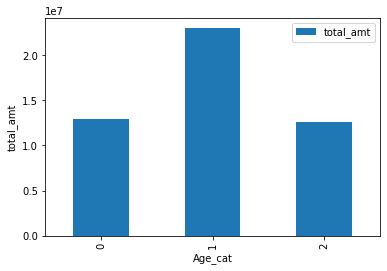

In [83]:
plt.figure(figsize=(8,8))
customer_age_grp.plot(xlabel = "Age_cat", ylabel = "total_amt", kind = "bar")
plt.show()

### a). What was the total amount spent for “Electronics” and “Books” product categories?

In [84]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          3176798.755
         Electronics    2887372.735
Name: total_amt, dtype: float64

In [85]:
customer_25_35.loc['25-35',['Books','Electronics']].sum()

6064171.49

In [86]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 6064171.49


### b). What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [87]:
# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']

In [88]:
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,1992-02-01,F,6.0,30.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,1987-06-08,F,7.0,35.0,25-35


In [89]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [90]:

total_amount.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,1992-07-27,M,8.0,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Books,DIY,1992-07-27,M,8.0,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,Footwear,Mens,1989-08-17,M,10.0,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,Bags,Women,1992-02-01,F,6.0,30.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.08,106.08,Flagship store,Footwear,Women,1987-06-08,F,7.0,35.0,25-35


In [91]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 428230.595


In [92]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [93]:
sold_prod.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0


In [94]:
# New Attribute : Monetary
rfm_m = sold_prod.groupby(["cust_id"])["total_amt"].sum().reset_index()
rfm_m.head()

,cust_id,total_amt
0,266783,8952.710
1,266784,5694.065
2,266785,28442.700
3,266788,6092.970
4,266794,28117.830


In [95]:
# New Attribute : Frequency

rfm_f = sold_prod.groupby("cust_id")['transaction_id'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['cust_id', 'Frequency']
rfm_f.head()

,cust_id,Frequency
0,266783,4
1,266784,3
2,266785,7
3,266788,4
4,266794,11


In [96]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='cust_id', how='inner')
rfm.head()

,cust_id,total_amt,Frequency
0,266783,8952.710,4
1,266784,5694.065,3
2,266785,28442.700,7
3,266788,6092.970,4
4,266794,28117.830,11


In [97]:
# New Attribute : Recency

# Convert to datetime to proper datatype

sold_prod['tran_date'] = pd.to_datetime(sold_prod['tran_date'],format='%d-%m-%Y %H:%M')


<ipython-input-97-0025b7d4613e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_prod['tran_date'] = pd.to_datetime(sold_prod['tran_date'],format='%d-%m-%Y %H:%M')


In [98]:
# Compute the maximum date to know the last transaction date

max_date = max(sold_prod['tran_date'])
max_date

Timestamp('2014-12-02 00:00:00')

In [99]:
# Compute the difference between max date and transaction date

sold_prod['Diff'] = max_date - sold_prod['tran_date']
sold_prod.head()

<ipython-input-99-cebc5fec8141>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_prod['Diff'] = max_date - sold_prod['tran_date']


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Diff
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,285 days
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,1986-10-13,M,1.0,285 days
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,1971-09-03,M,6.0,285 days
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,1970-06-26,F,10.0,285 days
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,1979-06-27,M,9.0,285 days


In [100]:
# Compute last transaction date to get the recency of customers

rfm_p = sold_prod.groupby('cust_id')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,cust_id,Diff
0,266783,456 days
1,266784,814 days
2,266785,657 days
3,266788,365 days
4,266794,0 days


In [101]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,cust_id,Diff
0,266783,456
1,266784,814
2,266785,657
3,266788,365
4,266794,0


In [102]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='cust_id', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,266783,8952.710,4,456
1,266784,5694.065,3,814
2,266785,28442.700,7,657
3,266788,6092.970,4,365
4,266794,28117.830,11,0


Text(0.5, 0, 'Attributes')

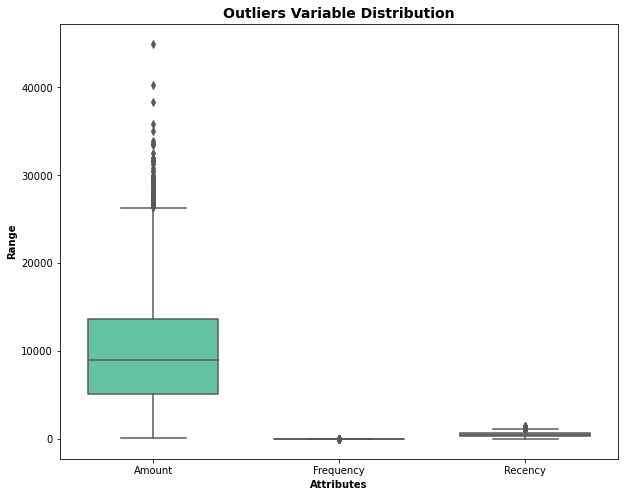

In [103]:
##There are 2 types of outliers and we will treat outliers as it can skew our dataset
#Statistical
#Domain specific

# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


In [104]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [105]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(5506, 3)

In [106]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.151908,0.113597,-0.345234
1,-0.680089,-0.431234,1.024068
2,3.007145,1.748091,0.423564
3,-0.615432,0.113597,-0.693297
4,2.954488,3.927416,-2.089373


In [107]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [108]:
kmeans.labels_

array([1, 0, 2, ..., 0, 0, 3])

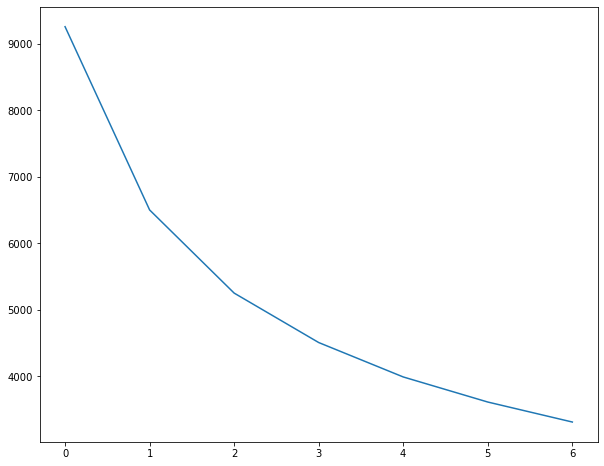

In [109]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [110]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.37200705609122964
For n_clusters=3, the silhouette score is 0.3460538732865417
For n_clusters=4, the silhouette score is 0.30308698201997447
For n_clusters=5, the silhouette score is 0.3081047924601753
For n_clusters=6, the silhouette score is 0.28097303370076826
For n_clusters=7, the silhouette score is 0.2654913114921466
For n_clusters=8, the silhouette score is 0.26558708082179117


In [111]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [112]:
kmeans.labels_

array([2, 1, 0, ..., 1, 1, 2])

In [113]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,266783,8952.710,4,456,2
1,266784,5694.065,3,814,1
2,266785,28442.700,7,657,0
3,266788,6092.970,4,365,2
4,266794,28117.830,11,0,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

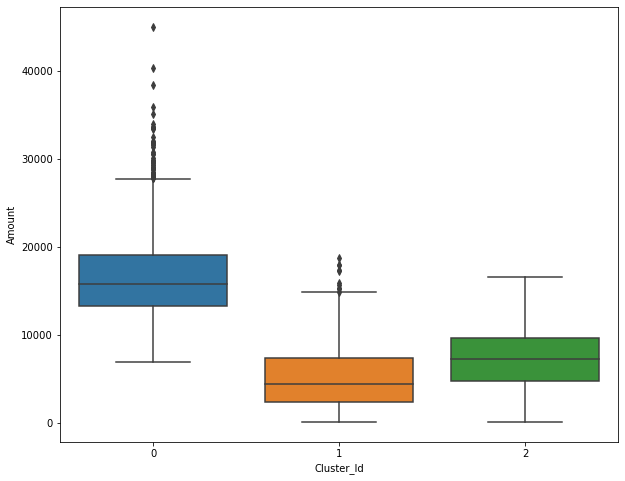

In [114]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

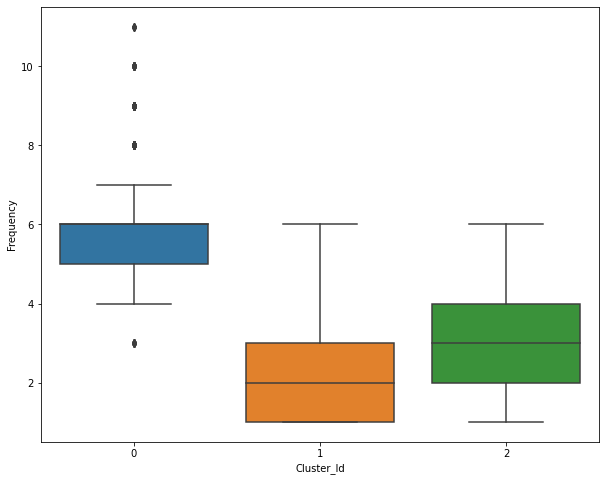

In [115]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

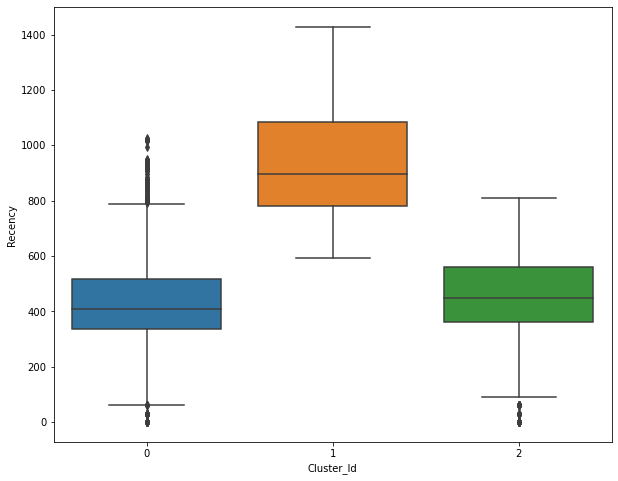

In [116]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)